<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [1]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

from scipy.stats import bernoulli, beta 
import pylab as plt
plt.rcParams['figure.figsize']=(15, 8)

In [2]:
# datos
cats = pd.read_csv('data/cookie_cats.csv')
cats.head()


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
# testeo para retention_1

imp_control1 = len(cats[cats['version'] == 'gate_30']['retention_1'])
conv_control1 = len(cats[(cats['version'] == 'gate_30') & (cats['retention_1'] == True)])


imp_test1 = len(cats[cats['version'] == 'gate_40']['retention_1'])
conv_test1 = len(cats[(cats['version'] == 'gate_40') & (cats['retention_1'] == True)])

print(f'Grupo control día1: impresiones: {imp_control1}, conversiones: {conv_control1}')
print(f'Grupo tratamiento día1: impresiones: {imp_test1}, conversiones: {conv_test1}')

Grupo control día1: impresiones: 44700, conversiones: 20034
Grupo tratamiento día1: impresiones: 45489, conversiones: 20119


In [7]:
CR_control1 = conv_control1/imp_control1
CR_test1 = conv_test1/imp_test1

print(f'Tasas de conversión día1: Control: {CR_control1}, Test: {CR_test1}')


Tasas de conversión día1: Control: 0.4481879194630872, Test: 0.44228274967574577


In [9]:
# a prioris

a_C, b_C = 1+conv_control1, 1+imp_control1-conv_control1

a_T, b_T = 1+conv_test1, 1+imp_test1-conv_test1


beta_control1 = beta(a_C, b_C)

beta_test1 = beta(a_T, b_T)

beta_control1.mean(), beta_test1.mean()   # comprobamos las medias

(0.44819023757326293, 0.44228528719966587)

In [10]:
x=np.linspace(0.433, 0.46, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

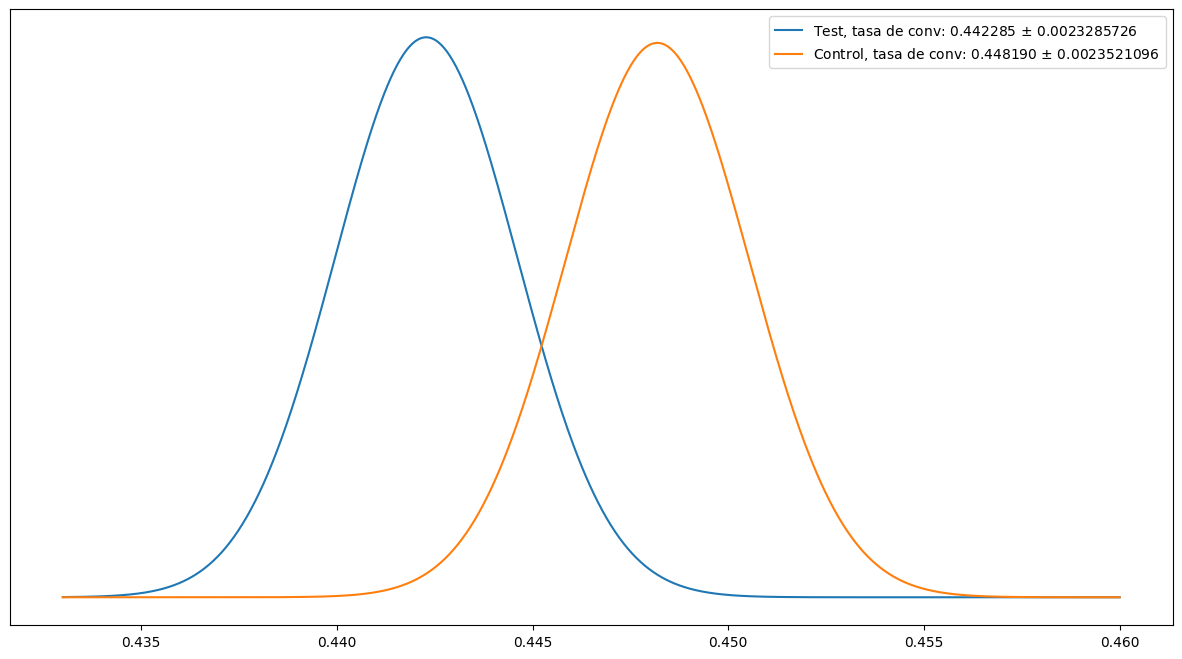

In [11]:
plot([beta_test1, beta_control1], ['Test', 'Control'])


In [12]:
salto1 = (beta_control1.mean() - beta_test1.mean())/beta_control1.mean()

salto1

0.013175098158249857

In [19]:
from bayes import *
calc_prob(beta_control1, beta_test1)

0.962793974846091

In [ ]:
# El grupo control aumenta la tasa de conversión en un 1,32% con una probabilidad del 96,27% 

In [20]:
# testeo para retention_7
imp_control7 = len(cats[cats['version'] == 'gate_30']['retention_7'])
conv_control7 = len(cats[(cats['version'] == 'gate_30') & (cats['retention_7'] == True)])


imp_test7 = len(cats[cats['version'] == 'gate_40']['retention_7'])
conv_test7 = len(cats[(cats['version'] == 'gate_40') & (cats['retention_7'] == True)])

print(f'Grupo control día7: impresiones: {imp_control7}, conversiones: {conv_control7}')
print(f'Grupo tratamiento día7: impresiones: {imp_test7}, conversiones: {conv_test7}')


Grupo control día7: impresiones: 44700, conversiones: 8502
Grupo tratamiento día7: impresiones: 45489, conversiones: 8279


In [21]:
CR_control7 = conv_control7/imp_control7
CR_test7 = conv_test7/imp_test7

print(f'Tasas de conversión día7: Control: {CR_control7}, Test: {CR_test7}')


Tasas de conversión día7: Control: 0.19020134228187918, Test: 0.18200004396667327


In [22]:
# a prioris

a_C, b_C = 1+conv_control7, 1+imp_control7-conv_control7

a_T, b_T = 1+conv_test7, 1+imp_test7-conv_test7


beta_control7 = beta(a_C, b_C)

beta_test7 = beta(a_T, b_T)

beta_control7.mean(), beta_test7.mean()   # comprobamos las medias

(0.19021520289919913, 0.18201402475214878)

In [30]:
x=np.linspace(0.16, 0.20, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

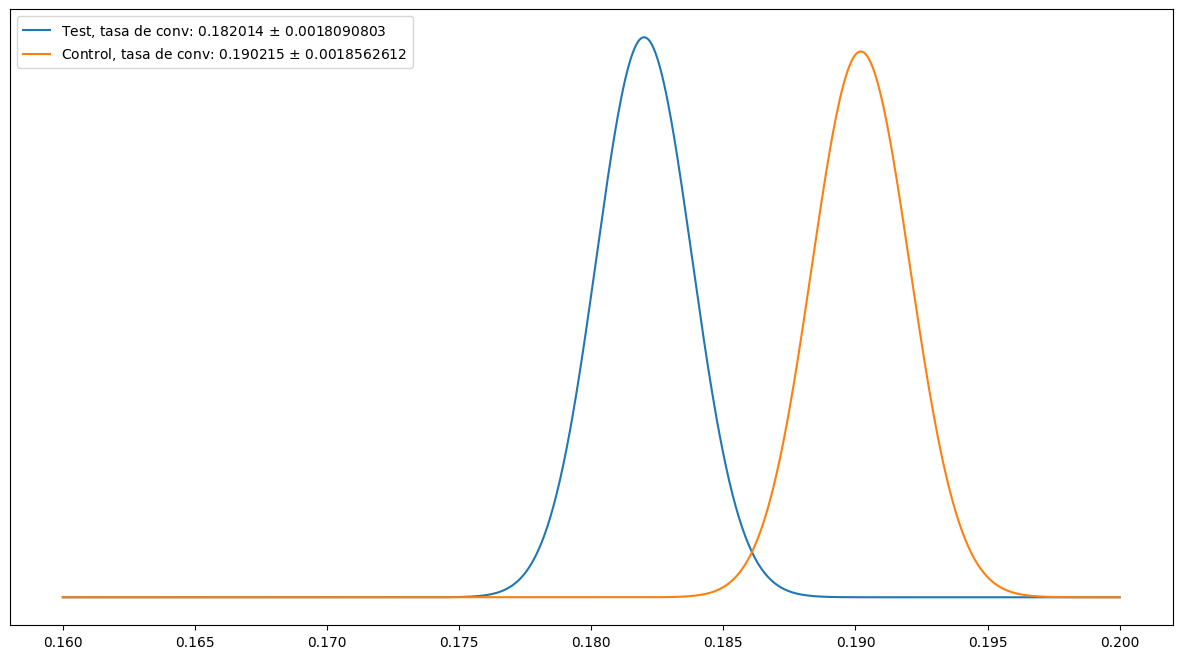

In [31]:
plot([beta_test7, beta_control7], ['Test', 'Control'])

In [32]:
salto1 = (beta_control7.mean() - beta_test7.mean())/beta_control7.mean()

salto1

0.04311526114658881

In [35]:

calc_prob(beta_control7, beta_test7)

# El grupo control aumenta la tasa de conversión en un 4.31% con un 99.9% de probabilidad

0.9992226613159454

# Conclusiones


### Retención a día 1:

- El grupo de control (gate 30) muestra un aumento en la tasa de conversión del 1.32% en comparación con el grupo de tratamiento (gate 40).
- La probabilidad de que este aumento es del 96.27%.
- Existe cierta evidencia a favor de que la versión con la puerta en el nivel 30 tiene una tasa de retención superior en comparación con la versión con la puerta en el nivel 40.


### Retención a día 7:

- El grupo de control (gate 30) muestra un aumento en la tasa de conversión del 4.31% en comparación con el grupo de tratamiento (gate 40).
- La probabilidad de este aumento es de un 99.9%.
- Existe evidencia a favor de que la versión con la puerta en el nivel 30 tiene una tasa de retención a día 7 significativamente superior en comparación con la versión con la puerta en el nivel 40.

### Conclusiones Generales:

Estos resultados proporcionan información valiosa para la toma de decisiones en el diseño del juego, sugiriendo que la versión con la puerta en el nivel 30 podría ser más efectiva en términos de retención a largo plazo. Sin embargo, es crucial considerar otras métricas y factores antes de tomar decisiones finales sobre implementar el cambio.